In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

plt.rcParams.update({'font.size': 15})

In [ ]:
list_x = [0, 1, 2, 3, 4]
list_y = [5, 6, 7, 8, 9, 10]

In [ ]:
for x in list_x:
  print(x)

0
1
2
3
4


In [ ]:
for x, y in zip(list_x, list_y):
  print(f"x = {x}, y = {y}")

x = 0, y = 5
x = 1, y = 6
x = 2, y = 7
x = 3, y = 8
x = 4, y = 9


In [ ]:
for i,x in enumerate(list_x):
  print(f"[{i}] ->  {x}")

[0] ->  0
[1] ->  1
[2] ->  2
[3] ->  3
[4] ->  4


In [ ]:
def power(input_list, p):
  """
    Raises each element of the input list to the power of p.

    Parameters:
    - input_list (list): A list of numerical values.
    - p (int or float): The power to which each element will be raised.

    Returns:
    - list: A new list where each element is raised to the power of p.
  """
  output_list = []
  for x in input_list:
    output_list.append(x**p)
  return output_list

In [ ]:
power?

In [ ]:
list_x_pow_3 = power(list_x, 3)
list_x_pow_3

[0, 1, 8, 27, 64]

In [ ]:
array_x = np.array(list_x)
print(array_x)

[0 1 2 3 4]


**List comprehension** w Pythonie to zwięzły sposób tworzenia nowych list poprzez iterację po istniejących kolekcjach i opcjonalne filtrowanie elementów. Jest to bardziej elegancka i czytelna alternatywa dla tradycyjnych pętli `for`.

Składnia list comprehension wygląda następująco:
```python
[wyrażenie for element in kolekcja if warunek]

In [ ]:
[x**2 for x in range(6)]

[0, 1, 4, 9, 16, 25]

In [ ]:
[x**2 for x in range(6) if x%2==0]

[0, 4, 16]

### Magiczne komendy w Jupyter Notebook

Magiczne komendy w Jupyter Notebook to specjalne polecenia, które zaczynają się od jednego lub dwóch znaków procenta (`%` lub `%%`). Służą one do wykonywania różnych zadań, takich jak pomiar czasu wykonania kodu, zarządzanie środowiskiem pracy, czy uruchamianie kodu w różnych językach programowania. Magiczne komendy mogą być używane zarówno w trybie liniowym (jednolinijkowym), jak i komórkowym (wielolinijkowym).

#### Przykłady magicznych komend:

1. **%timeit**: Mierzy czas wykonania pojedynczej linii kodu.
    ```python
    %timeit [x**2 for x in range(1000)]
    ```

2. **%%timeit**: Mierzy czas wykonania całej komórki kodu.
    ```python
    %%timeit
    total = 0
    for i in range(1000):
        total += i**2
    ```

3. **%time**: Mierzy czas wykonania pojedynczej linii kodu, ale tylko raz.
    ```python
    %time sum(range(1000))
    ```

4. **%%time**: Mierzy czas wykonania całej komórki kodu, ale tylko raz.
    ```python
    %%time
    total = 0
    for i in range(1000):
        total += i**2
    ```

5. **%lsmagic**: Wyświetla listę wszystkich dostępnych magicznych komend.
    ```python
    %lsmagic
    ```

6. **! ls**: Wyświetla zawartość bieżącego katalogu (polecenie systemowe).
    ```python
    ! ls
    ```

7. **%pwd**: Wyświetla bieżący katalog roboczy.
    ```python
    %pwd
    ```

8. **%cd**: Zmienia bieżący katalog roboczy.
    ```python
    %cd /path/to/directory
    ```

9. **%who**: Wyświetla listę wszystkich zmiennych w bieżącej przestrzeni nazw.
    ```python
    %who
    ```

10. **%whos**: Wyświetla szczegółową listę wszystkich zmiennych w bieżącej przestrzeni nazw.
    ```python
    %whos
    ```


## **Zadanie 1**: Pomiar czasu wykonania różnych operacji w Pythonie

W tym zadaniu będziemy mierzyć czas wykonania różnych operacji w Pythonie za pomocą magicznej komendy %timeit. Celem jest porównanie wydajności różnych implementacji tych samych operacji.

    Pomiar czasu wykonania pętli for:
        Napisz funkcję, która sumuje liczby od 1 do 1,000,000 za pomocą pętli for.
        Użyj %timeit, aby zmierzyć czas wykonania tej funkcji.

    Pomiar czasu wykonania list comprehension:
        Napisz funkcję, która sumuje liczby od 1 do 1,000,000 za pomocą list comprehension.
        Użyj %timeit, aby zmierzyć czas wykonania tej funkcji.

    Pomiar czasu wykonania funkcji sum():
        Napisz funkcję, która sumuje liczby od 1 do 1,000,000 za pomocą wbudowanej funkcji sum().
        Użyj %timeit, aby zmierzyć czas wykonania tej funkcji.

    Porównanie wyników:
        Porównaj wyniki pomiarów czasu wykonania dla każdej z metod.
        Która metoda jest najszybsza? Dlaczego?


In [ ]:
N = 1_000_000
def suma_for():
    suma = 0
    for i in range(1, N + 1):
        suma += i
    return suma

%timeit suma_for()


57.5 ms ± 649 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
del sum
def suma_list_comprehension():
    return sum([i for i in range(1, 1_000_001)])

%timeit sum_list_comprehension()


61 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
def sum_builtin():
    return sum(range(1, 1_000_001))

%timeit sum_builtin()


25.5 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1. Pętla for – działa najwolniej z trzech metod (~57.5 ms). Wynika to z tego, że każda iteracja pętli jest wykonywana w Pythonie krok po kroku, co niesie ze sobą narzut interpretacji.
2. List comprehension – jest nieco wolniejsza niż pętla for (~61 ms). Dzieje się tak, ponieważ list comprehension najpierw tworzy pełną listę z milionem elementów, a następnie ta lista jest sumowana.
3. Wbudowana funkcja sum() na range() – jest najszybsza (~25.5 ms).

Funkcja sum() jest najszybsza, ponieważ działa na generatorze range() bez tworzenia dodatkowej listy i jest zaimplementowana w zoptymalizowanym kodzie.

## **Zadanie 2**

**Część 1**: Funkcja add_list

Napisz funkcję `add_list`, która przyjmuje jako argumenty dwie listy liczb całkowitych lub zmiennoprzecinkowych. Funkcja powinna zwracać nową listę, w której każdy element jest wynikiem dodania odpowiadających sobie elementów z podanych list. Możesz wykorzystać funkcję zip do iteracji przez obie listy jednocześnie.


**Część 2**: Operacje na tablicach numpy

Stwórz dwie tablice numpy, zawierające liczby całkowite lub zmiennoprzecinkowe.
Dodaj te tablice element po elemencie, wykorzystując odpowiednią operację numpy.

Uwaga: Zapewnij, że obie tablice mają tę samą długość, aby uniknąć błędów podczas operacji dodawania.


In [ ]:
def add_list(list1, list2):
    return [a + b for a, b in zip(list1, list2)]
list_a = [1, 2, 3]
list_b = [4, 5, 6]
result = add_list(list_a, list_b)
print(result)



[5, 7, 9]


In [ ]:
import numpy as np
j1 = np.array([1, 2, 3])
j2 = np.array([4, 5, 6])

result_array = j1 + j2
print(result_array)


[5 7 9]


## **Zadanie 3**

Część 1: Funkcja do obliczania średniej i mediany

Napisz dwie funkcje w języku Python:

    calculate_mean - powinna przyjmować listę liczb i zwracać ich średnią arytmetyczną.
    calculate_median - powinna przyjmować listę liczb i zwracać medianę tej listy.

Część 2: Porównanie z funkcjami numpy

Użyj funkcji np.mean i np.median, aby obliczyć średnią i medianę tej samej listy liczb.

In [ ]:
def calculate_mean(numbers):
    """Oblicza średnią arytmetyczną listy liczb."""
    return sum(numbers) / len(numbers) if numbers else None

def calculate_median(numbers):
    """Oblicza medianę listy liczb."""
    n = len(numbers)
    if n == 0:
        return None
    sorted_numbers = sorted(numbers)
    mid = n // 2
    if n % 2 == 1:  #liczby nieparzyste
        return sorted_numbers[mid]
    else:  #liczby parzyste
        return (sorted_numbers[mid - 1] + sorted_numbers[mid]) / 2


In [ ]:
import numpy as np
life_exp_top_15 = [81.8, 81, 82.6, 83, 81.8, 84.3, 82.8, 81.9, 82.2, 82, 82.7,
                   79.8, 83.3, 82]


mean_custom = calculate_mean(life_exp_top_15)
median_custom = calculate_median(life_exp_top_15)


mean_numpy = np.mean(life_exp_top_15)
median_numpy = np.median(life_exp_top_15)

print(f"Średnia własna: {mean_custom}")
print(f"Mediana własna: {median_custom}")
print(f"Średnia numpy: {mean_numpy}")
print(f"Mediana numpy: {median_numpy}")


Średnia własna: 82.22857142857143
Mediana własna: 82.1
Średnia numpy: 82.22857142857143
Mediana numpy: 82.1


In [ ]:
life_exp_top_15 = [81.8, 81, 82.6, 83, 81.8, 84.3, 82.8, 81.9, 82.2, 82, 82.7,
                   79.8, 83.3, 82]

In [ ]:
median_with_numpy = np.median(life_exp_top_15)

# Tablice numpy i wykresy

In [ ]:
np.arange(-3, 4)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ,  3.5])

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
np.arange(-3, 4, 3)

array([-3,  0,  3])

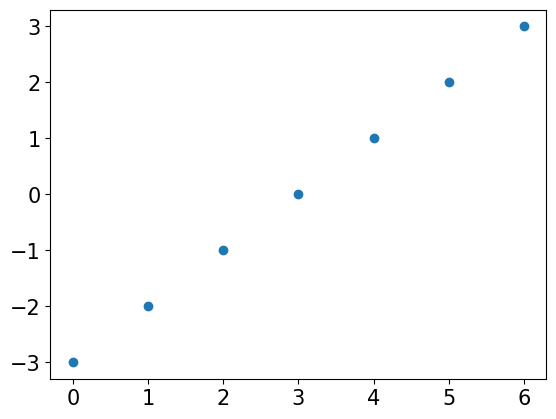

In [ ]:
plt.scatter(np.arange(0, 7), np.arange(-3, 4))

In [ ]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

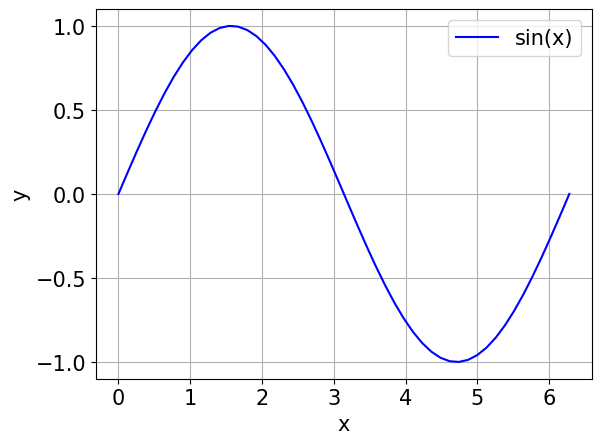

In [ ]:
plt.plot(x, y, 'b-', label="sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

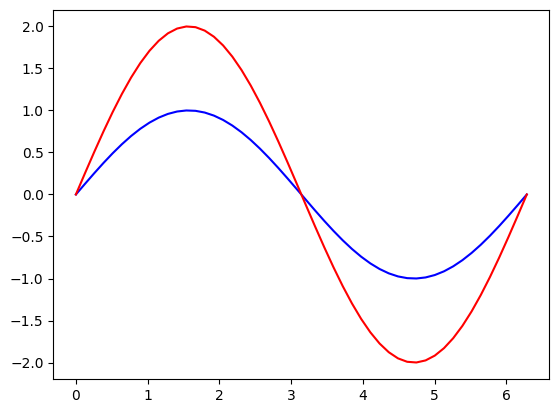

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-')
ax.plot(x, 2*y, 'r-')

In [ ]:
def set_label(ax):
  ax.set_xlabel("x", fontsize=15)
  ax.set_ylabel("y", fontsize=15)

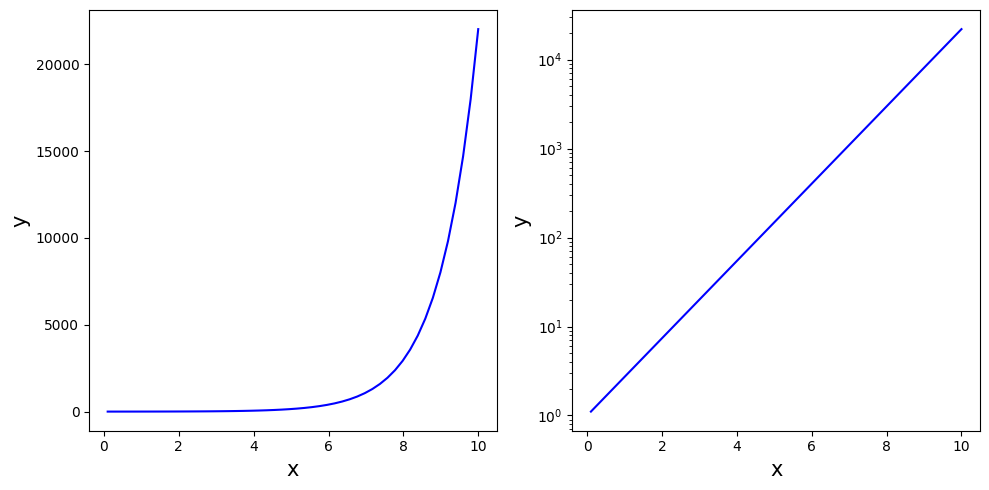

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

x = np.linspace(0.1, 10, 50)
y = np.exp(x)

ax[0].plot(x, y, 'b-')
ax[1].plot(x, y, 'b-')
ax[1].set_yscale('log')
set_label(ax[0])
set_label(ax[1])
plt.tight_layout()

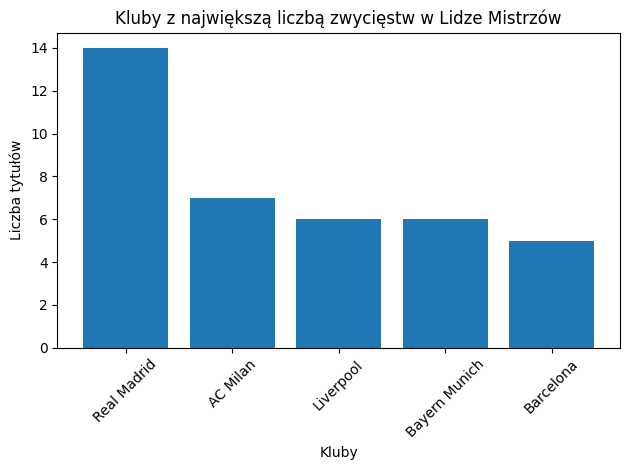

In [ ]:
# Listy
kluby = ["Real Madrid", "AC Milan", "Liverpool", "Bayern Munich", "Barcelona"]
tytuly = [14, 7, 6, 6, 5]

# Tworzenie wykresu słupkowego
plt.bar(kluby, tytuly)
plt.xlabel('Kluby')
plt.ylabel('Liczba tytułów')
plt.title('Kluby z największą liczbą zwycięstw w Lidze Mistrzów')
plt.xticks(rotation=45)
plt.tight_layout()

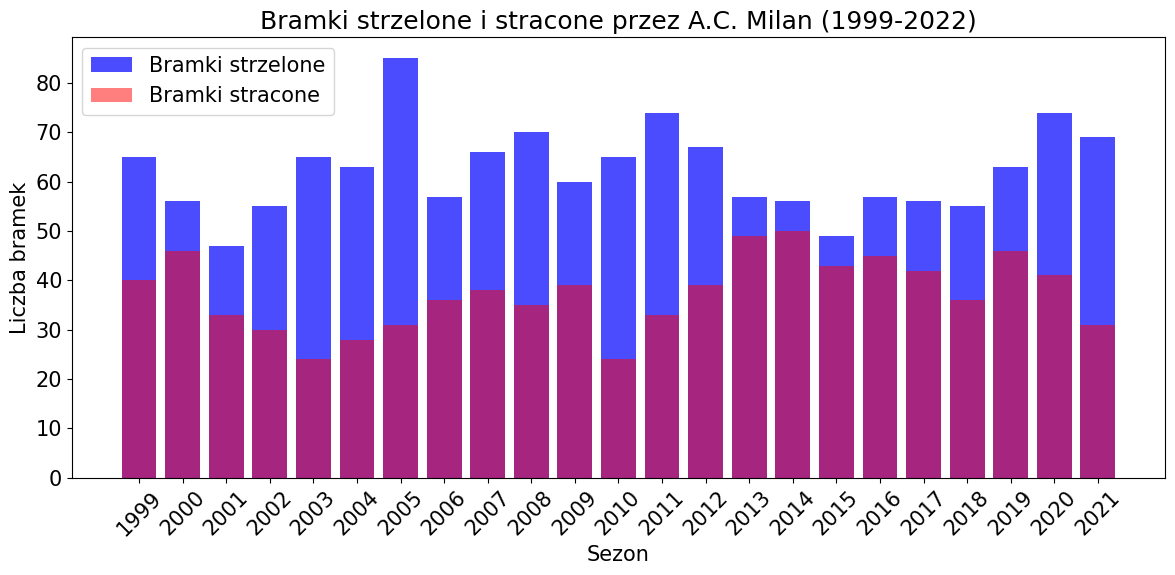

In [ ]:
# Listy
bramki_strzelone = [65, 56, 47, 55, 65, 63, 85, 57, 66, 70, 60, 65, 74, 67, 57, 56, 49, 57, 56, 55, 63, 74, 69]
bramki_stracone = [40, 46, 33, 30, 24, 28, 31, 36, 38, 35, 39, 24, 33, 39, 49, 50, 43, 45, 42, 36, 46, 41, 31]
sezony = [str(i) for i in range(1999, 2022)]

# Tworzenie histogramu
plt.figure(figsize=(12, 6))
plt.bar(sezony, bramki_strzelone, label='Bramki strzelone', color='blue', alpha=0.7)
plt.bar(sezony, bramki_stracone, label='Bramki stracone', color='red', alpha=0.5)
plt.xlabel('Sezon')
plt.ylabel('Liczba bramek')
plt.title('Bramki strzelone i stracone przez A.C. Milan (1999-2022)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

(array([2., 1., 5., 6., 4., 4., 1., 0.]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 [<matplotlib.patches.Polygon at 0x797650c370a0>])

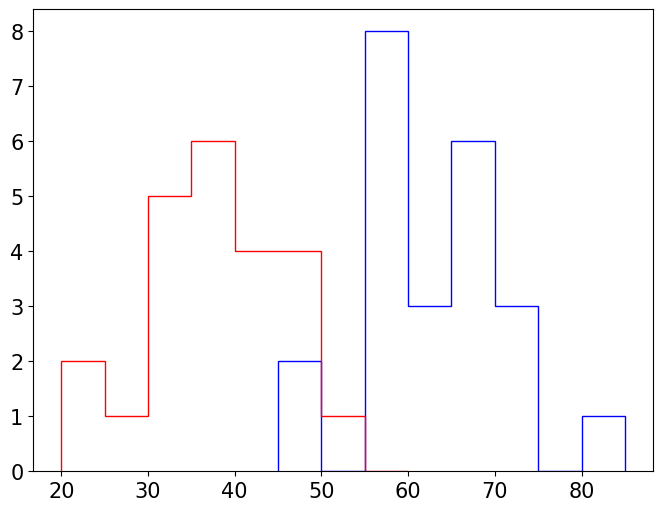

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(bramki_strzelone, label='Bramki strzelone', color='blue', histtype='step', bins=8, range=(45, 85))
plt.hist(bramki_stracone, label='Bramki stracone', color='red', histtype='step', bins=8, range=(20, 60))

## Zadanie 4: Wykres sin(x)

Napisz kod, który stworzy dwa wykresy obok siebie. Na pierwszym wykresie przedstaw funkcję y = sin(x) w stosunku do x, a na drugim wykresie przedstaw funkcję y = 2*sin(x) w stosunku do x. Oba wykresy powinny mieć zakres osi Y od -2.1 do 2.1. Użyj niebieskiej linii dla pierwszego wykresu i czerwonej linii dla drugiego.

Wykresy powinny być umieszczone obok siebie w jednym oknie o rozmiarze 10x5.

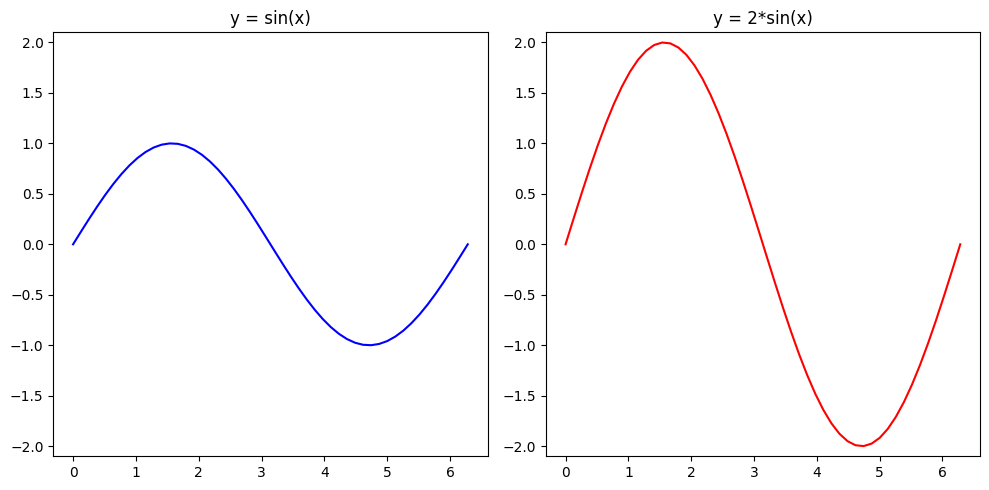

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)


y1 = np.sin(x)
y2 = 2 * np.sin(x)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].plot(x, y1, color='blue')
axs[0].set_ylim(-2.1, 2.1)
axs[0].set_title('y = sin(x)')


axs[1].plot(x, y2, color='red')
axs[1].set_ylim(-2.1, 2.1)
axs[1].set_title('y = 2*sin(x)')


plt.tight_layout()
plt.show()


## Zadanie 5: Funkcja gęstości prawdopodobieństwa dla rozkładu normalnego

1. **Zdefiniuj funkcję gęstości prawdopodobieństwa** dla rozkładu normalnego wg wzoru:
$$ f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
Gdzie:
   - \( x \) to zmienna,
   - $ \mu $ to wartość średnia rozkładu,
   - $ \sigma $ to odchylenie standardowe rozkładu.

2. **Wizualizacja funkcji:** Używając biblioteki `matplotlib`, stwórz wykres funkcji gęstości prawdopodobieństwa dla trzech różnych par wartości $ \mu $ i $ \sigma $. Przykładowe wartości to:
   - $ \mu = 0, \sigma = 1 $
   - $ \mu = 0, \sigma = 2 $
   - $ \mu = 2, \sigma = 1 $

3. **Oznaczenia na wykresie:** Dodaj do wykresu odpowiednie oznaczenia osi, tytuł oraz legendę, która pokaże, której linii odpowiada jaka para wartości $ \mu $ i $ \sigma $.

### Wskazówki:
- Użyj biblioteki `numpy` do operacji matematycznych oraz do generowania wartości `x` dla wykresu.
- Pamiętaj o dodaniu odpowiednich etykiet, tytułu oraz legendy do wykresu.







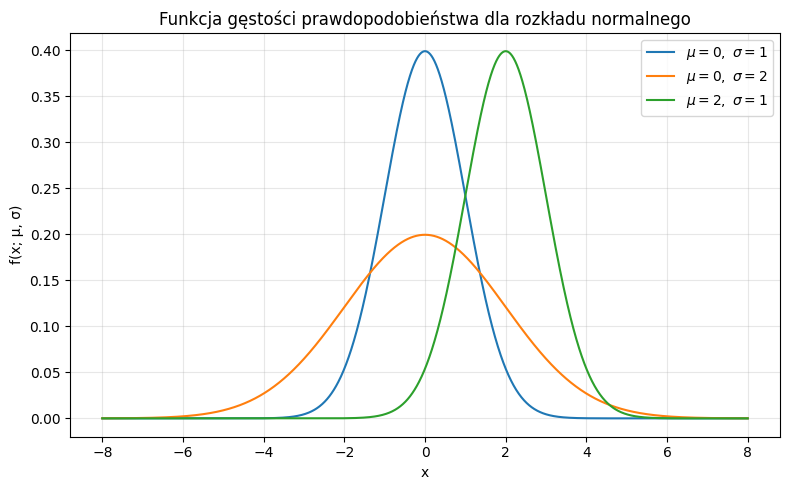

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def normal_pdf(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


x = np.linspace(-8, 8, 2000)


params = [
    (0, 1),
    (0, 2),
    (2, 1),
]


plt.figure(figsize=(8, 5))
for mu, sigma in params:
    y = normal_pdf(x, mu, sigma)
    plt.plot(x, y, label=fr'$\mu={mu},\ \sigma={sigma}$')


plt.xlabel('x')
plt.ylabel('f(x; μ, σ)')
plt.title('Funkcja gęstości prawdopodobieństwa dla rozkładu normalnego')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


# **Moduł random**

Moduł `random` w języku Python jest używany do generowania liczb losowych oraz do wykonywania różnych operacji związanych z losowością. Oferuje on szeroki zakres funkcji, które pozwalają na:

1. **Generowanie liczb losowych:**
   - `random.random()`: Zwraca losową liczbę zmiennoprzecinkową z przedziału [0.0, 1.0).
   - `random.randint(a, b)`: Zwraca losową liczbę całkowitą z przedziału [a, b].
   - `random.uniform(a, b)`: Zwraca losową liczbę zmiennoprzecinkową z przedziału [a, b].

2. **Losowy wybór elementów:**
   - `random.choice(seq)`: Zwraca losowy element z niepustej sekwencji `seq`.
   - `random.choices(population, weights=None, k=1)`: Zwraca listę `k` elementów wybranych losowo z `population` z opcjonalnymi wagami `weights`.

3. **Losowe permutacje:**
   - `random.shuffle(x)`: Miesza elementy listy `x` w miejscu.
   - `random.sample(population, k)`: Zwraca listę `k` unikalnych elementów wybranych losowo z `population`.

4. **Generowanie liczb z rozkładów statystycznych:**
   - `random.gauss(mu, sigma)`: Zwraca losową liczbę z rozkładu normalnego o średniej `mu` i odchyleniu standardowym `sigma`.
   - `random.expovariate(lambd)`: Zwraca losową liczbę z rozkładu wykładniczego o współczynniku `lambd`.

Moduł `random` jest używany w wielu dziedzinach, takich jak symulacje, gry, testowanie, czy generowanie danych testowych.

In [ ]:
# Ustawia ziarno generatora liczb losowych na 10, co sprawia, że losowe liczby będą powtarzalne
random.seed(10)
# Drukuje losową liczbę zmiennoprzecinkową z zakresu od 0.0 do 1.0; wynik będzie taki sam przy każdym uruchomieniu z powodu ustawionego ziarna
print(random.random())

random.seed(10)
print(random.random())


0.5714025946899135
0.5714025946899135


In [ ]:
lottery_numbers = range(49)
print(f"Numery: {lottery_numbers}")
winning_numbers = random.sample(lottery_numbers, 6)
print(winning_numbers)

Numery: range(0, 49)
[27, 30, 36, 0, 13, 29]


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-473024014.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(normal_1, bins=20, range=(-0.4, 0.4), label="$\mu$=0, $\sigma$=0.1")


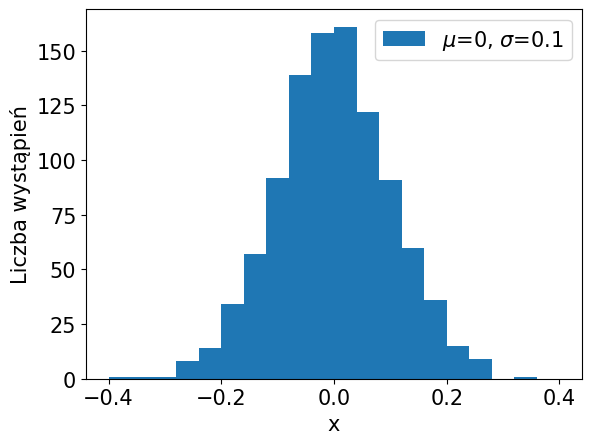

In [ ]:
mu1, sigma1 = 0, 0.1  # średnia i odchylenie standardowe
normal_1 = np.random.normal(mu1, sigma1, 1000) # Generowanie rozkładu normalnego

plt.hist(normal_1, bins=20, range=(-0.4, 0.4), label="$\mu$=0, $\sigma$=0.1")
plt.xlabel("x")
plt.ylabel("Liczba wystąpień")
plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-817894301.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(normal_1, bins=10, range=(-0.4, 0.4), density=True, histtype='step', lw=2, label="$\mu$=0, $\sigma$=0.1")


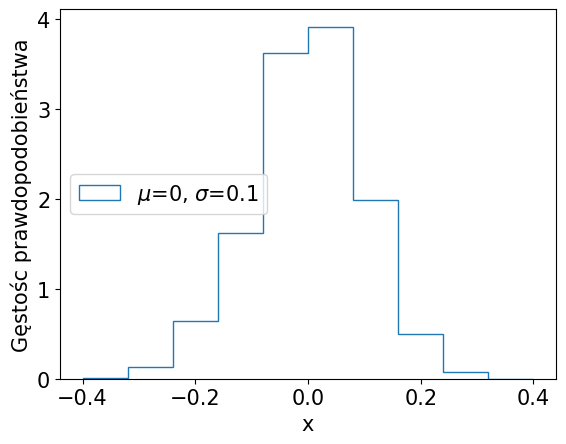

In [ ]:
mu1, sigma1 = 0, 0.1  # średnia i odchylenie standardowe
normal_1 = np.random.normal(mu1, sigma1, 1000) # Generowanie rozkładu normalnego

plt.hist(normal_1, bins=10, range=(-0.4, 0.4), density=True, histtype='step', lw=2, label="$\mu$=0, $\sigma$=0.1")
plt.xlabel("x")
plt.ylabel("Gęstośc prawdopodobieństwa")
plt.legend()

# Zadanie 6:

Stwórz wykres przedstawiający rozkład normalny dla różnych wartości średnich (μ) i odchyleń standardowych (σ) z użyciem bibliotek numpy i matplotlib.

## Instrukcje

1. Używając funkcji z `numpy.random`, wygeneruj dane dla rozkładu normalnego dla trzech różnych kombinacji wartości średnich i odchyleń standardowych:
   - (0, 1)
   - (0, 2)
   - (2, 1)

2. Używając `matplotlib`, stwórz histogram dla każdego zestawu danych. Każdy zestaw danych powinien być przedstawiony na wykresie różnym kolorem, aby można było łatwo rozróżnić różne kombinacje μ i σ.

3. Dodaj etykiety do osi X i Y, tytuł wykresu oraz legendę, aby wykres był jak najbardziej czytelny.


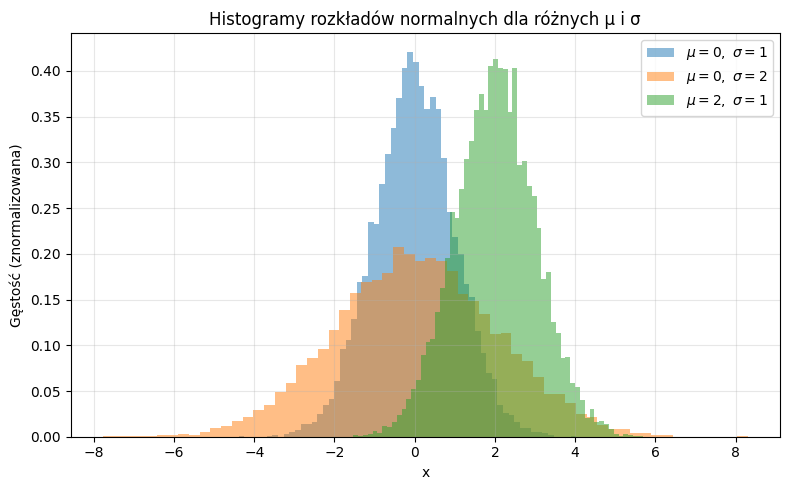

In [2]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng(42)

params = [
    (0, 1),
    (0, 2),
    (2, 1),
]
N = 10000


datasets = []
for mu, sigma in params:
    samples = rng.normal(loc=mu, scale=sigma, size=N)
    datasets.append((samples, mu, sigma))


plt.figure(figsize=(8, 5))
for data, mu, sigma in datasets:
    plt.hist(
        data,
        bins=60,
        density=True,
        alpha=0.5,
        label=fr'$\mu={mu},\ \sigma={sigma}$'
    )


plt.xlabel('x')
plt.ylabel('Gęstość (znormalizowana)')
plt.title('Histogramy rozkładów normalnych dla różnych μ i σ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()



plt.show()


# Zadanie 7

Stwórz wykres, który będzie analogiczny do przedstawionego na załączonym obrazku. Wykres powinien zawierać dane obliczone analitycznie oraz dane wygenerowane za pomocą liczb losowych, obie reprezentujące rozkład gęstości prawdopodobieństwa opisany krzywą Gaussa.

## Instrukcje

1. Wygeneruj dane za pomocą funkcji `numpy.random.normal` dla różnych wartości parametrów $\mu$ i $\sigma$.
2. Oblicz analityczną gęstość prawdopodobieństwa dla tych samych wartości $\mu$ i $\sigma$.
3. Stwórz wykresy dla trzech różnych kombinacji wartości $\mu$ i $\sigma$:
   - (0, 1)
   - (0, 2)
   - (2, 1)
4. Każdy wykres powinien zawierać zarówno dane wygenerowane, jak i dane obliczone analitycznie.
5. Umieść wszystkie trzy wykresy w jednym oknie wykresu (figure), podzielonym na trzy wiersze.
6. Dodaj tytuły do każdego wykresu, które będą zawierały wartości $\mu$ i $\sigma$.
7. Dodaj etykiety do osi X i Y oraz legendę, aby wykresy były jak najbardziej czytelne.



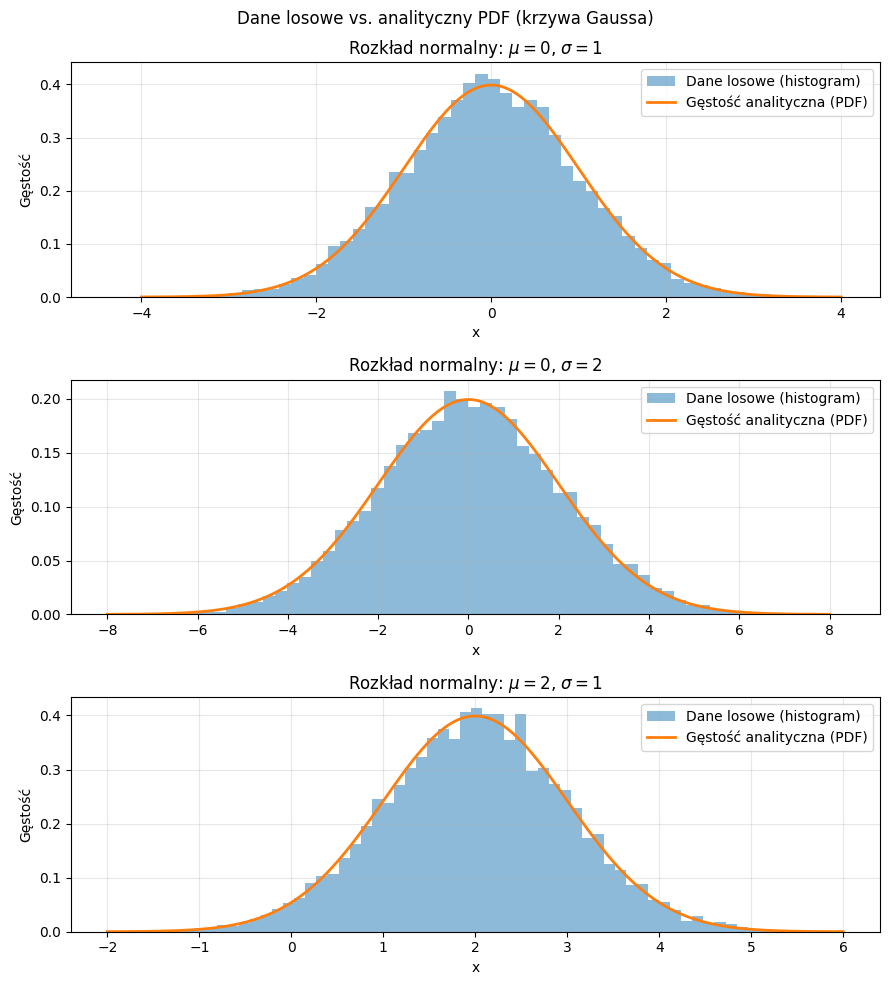

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

rng = np.random.default_rng(42)

params = [
    (0, 1),
    (0, 2),
    (2, 1),
]

N = 10000

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 10), sharex=False)

for i, (mu, sigma) in enumerate(params):
    ax = axes[i]

    samples = rng.normal(loc=mu, scale=sigma, size=N)

    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    pdf = normal_pdf(x, mu, sigma)

    ax.hist(
        samples,
        bins=60,
        density=True,
        alpha=0.5,
        label='Dane losowe (histogram)'
    )
    ax.plot(x, pdf, linewidth=2, label='Gęstość analityczna (PDF)')


    ax.set_title(fr'Rozkład normalny: $\mu={mu}$, $\sigma={sigma}$')
    ax.set_xlabel('x')
    ax.set_ylabel('Gęstość')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')


fig.suptitle('Dane losowe vs. analityczny PDF (krzywa Gaussa)', y=0.98)
plt.tight_layout()
plt.show()


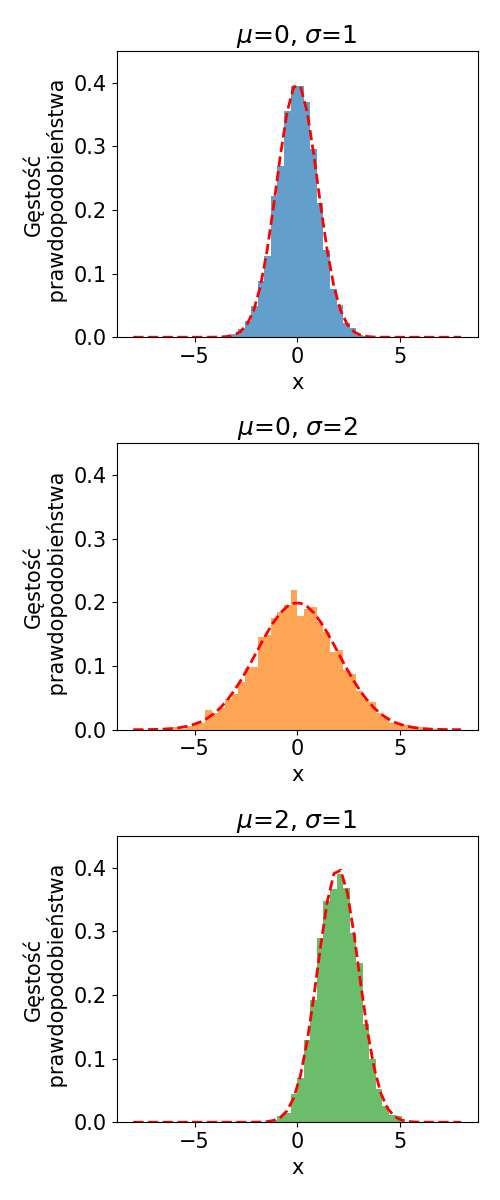